In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install arviz

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 33.9MB/s 
     |████████████████████████████████| 317kB 55.4MB/s 


In [0]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

# Regresión lineal Bayesiana

## Observaciones sintéticas

In [0]:
n = 100
a = 1
b = 2
s = 0.5

xe = np.linspace(0, 1, n)
ye = a + b * xe
y  = ye + np.random.normal(scale=s, size=n)

x    = np.append(xe, [.1, .15, .2])
yobs = np.append(y,  [8, 6, 9])

([<matplotlib.lines.Line2D at 0x7f9717959b00>],
 Text(0.5, 0, '$x$'),
 Text(0, 0.5, '$y$'))

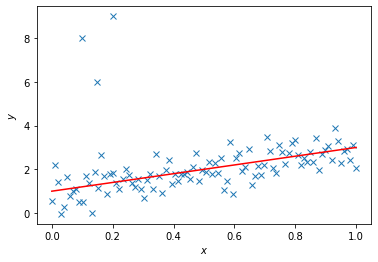

In [12]:
plt.plot(x, yobs, 'x')
plt.plot(xe, ye,  'r'), plt.xlabel(r'$x$'), plt.ylabel(r'$y$')

## Regresión normal ordinaria

In [0]:
mn = pm.Model()
with mn:
    alpha = pm.Flat('alpha')
    beta  = pm.Normal('beta')
    sigma = pm.HalfFlat('sigma')
    mu    = alpha + beta * x
    y     = pm.Normal('y', mu=mu, sd=sigma, observed=yobs)

In [14]:
with mn:
    tn = pm.sample(5000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 5500/5500 [00:07<00:00, 774.76it/s]


In [15]:
pm.summary(tn)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.589625,0.225038,0.003017,1.143448,2.020039,4414.944901,0.999900
beta,1.075309,0.386550,0.005245,0.330906,1.831405,4337.042899,0.999900
sigma,1.236772,0.089000,0.001098,1.064287,1.414517,6289.681445,1.001146


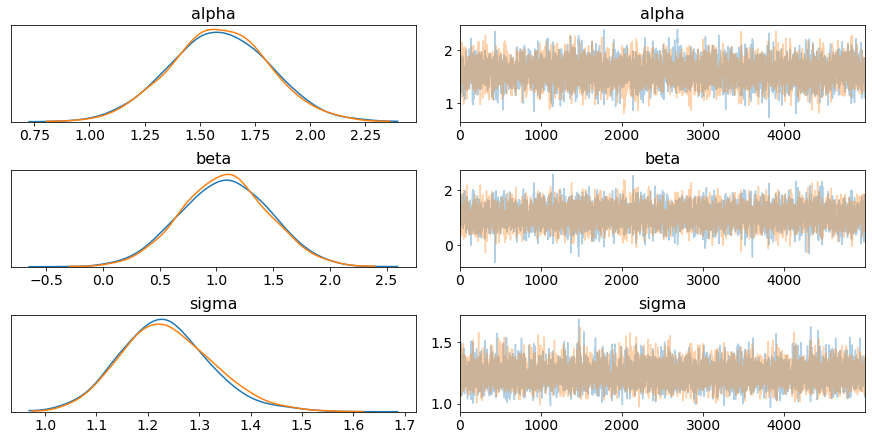

In [16]:
pm.traceplot(tn);

100%|██████████| 100/100 [00:01<00:00, 51.56it/s]


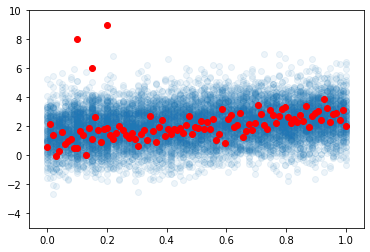

In [17]:
nppc = 100
ppc  = pm.sample_posterior_predictive(tn, samples=nppc, model=mn)
plt.scatter(np.tile(x, (nppc, 1)), ppc['y'], alpha=0.08)
plt.scatter(x, yobs, color='r')
plt.ylim(-5, 10);

## Modelo robusto

In [0]:
mt = pm.Model()
with mt:
    alpha = pm.Flat('alpha')
    beta  = pm.Normal('beta')
    sigma = pm.HalfFlat('sigma')
    nu    = pm.Gamma('nu', alpha=2, beta=0.1)
    mu    = alpha + beta * x
    y     = pm.StudentT('y', nu=nu, mu=mu, sd=sigma, observed=yobs)

In [19]:
with mt:
    tt = pm.sample(5000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, sigma, beta, alpha]
100%|██████████| 5500/5500 [00:10<00:00, 500.12it/s]


In [20]:
pm.summary(tt)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.010235,0.122312,0.001733,0.769818,1.247367,6051.370473,0.999901
beta,1.864659,0.207215,0.003140,1.439366,2.251265,5993.668856,0.999901
sigma,0.477343,0.055342,0.000648,0.373631,0.590945,6364.827295,1.000045
nu,2.659283,0.664151,0.007906,1.543518,4.006185,6976.357546,0.999962


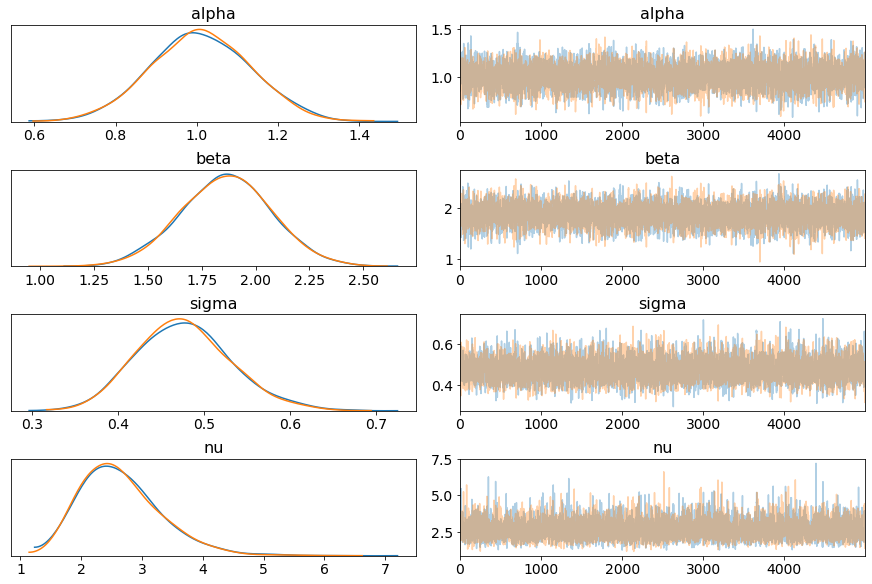

In [21]:
pm.traceplot(tt);

100%|██████████| 100/100 [00:00<00:00, 713.71it/s]


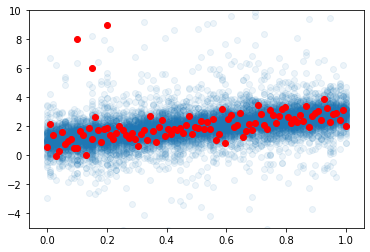

In [22]:
nppc = 100
ppc  = pm.sample_posterior_predictive(tt, samples=nppc, model=mt)
plt.scatter(np.tile(x, (nppc, 1)), ppc['y'], alpha=0.08)
plt.scatter(x, yobs, color='r')
plt.ylim(-5, 10);